# Group Project R code

In [1]:
library(caret)
library(dplyr)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# load dataset 

df <- read.table("Fish.csv", sep=",", header=TRUE)

In [3]:
# remove row 41

df<- df[-41,]

In [4]:
# create training / testing split

set.seed(1311) #for reproducibility

trainRowNumbers <- createDataPartition(df$Weight, p=0.8, list=FALSE)

train_df <- df[trainRowNumbers,]
test_df <- df[-trainRowNumbers,]

head(train_df, 3)

,Species,Weight,Length1,Length2,Length3,Height,Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bream,242,23.2,25.4,30.0,11.52,4.0200
2,Bream,290,24.0,26.3,31.2,12.48,4.3056
4,Bream,363,26.3,29.0,33.5,12.73,4.4555


### Baseline Model 0: 

In [5]:
# baseline model 

reg0 <- lm(Weight ~ Length1 + Species + Width + Height, data=train_df)
summary(reg0)


Call:
lm(formula = Weight ~ Length1 + Species + Width + Height, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-195.390  -57.164   -6.688   38.324  308.249 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -766.9851    92.3209  -8.308 1.88e-13 ***
Length1            40.5621     4.3066   9.419 4.77e-16 ***
SpeciesParkki      69.5475    56.0353   1.241  0.21702    
SpeciesPerch        7.4104    88.5116   0.084  0.93342    
SpeciesPike      -316.5156   137.3877  -2.304  0.02298 *  
SpeciesRoach       12.8467    83.0116   0.155  0.87728    
SpeciesSmelt      296.3829    98.3735   3.013  0.00317 ** 
SpeciesWhitefish    1.6789    85.3359   0.020  0.98434    
Width               0.1042    26.1752   0.004  0.99683    
Height             10.7434    14.1417   0.760  0.44895    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 93.91 on 118 degrees of freedom
Multiple R-squared:  0.93

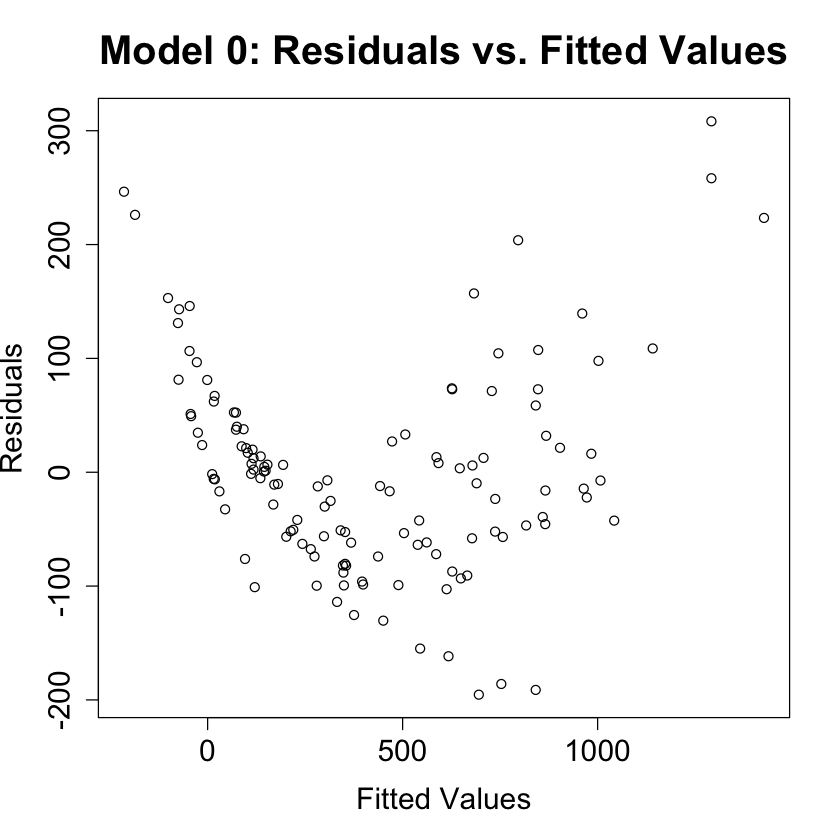

In [6]:
# fig. 7

options(repr.plot.width=7, repr.plot.height=7)

plot(reg0$fitted.values, reg0$resid, main=  "Model 0: Residuals vs. Fitted Values", xlab="Fitted Values", 
ylab= "Residuals",  cex.lab=1.5, cex.axis=1.5, cex.main=2)

In [7]:
# normality test

shapiro.test(reg0$residuals)


	Shapiro-Wilk normality test

data:  reg0$residuals
W = 0.95954, p-value = 0.0007389


In [8]:
p0 <- predict(reg0, test_df, type = "response") #predict on test set

error0 <- test_df$Weight - p0

RMSE0 <- sqrt(mean(error0^2))

max0 <- max(test_df$Weight)

min0 <- min(test_df$Weight)

norm_rmse0 <- RMSE0/(max0-min0)

norm_rmse0

[1] 0.1117643

### Model 1:

In [9]:
#fit model 1:

reg1 <- lm(Weight ~ Species:I(Length1^3), data=train_df)
summary(reg1)


Call:
lm(formula = Weight ~ Species:I(Length1^3), data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-225.073  -19.145   -1.059   12.692  270.712 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   6.659e-02  1.009e+01   0.007    0.995    
SpeciesBream:I(Length1^3)     2.141e-02  4.815e-04  44.471  < 2e-16 ***
SpeciesParkki:I(Length1^3)    2.182e-02  2.876e-03   7.587 7.72e-12 ***
SpeciesPerch:I(Length1^3)     1.658e-02  3.680e-04  45.060  < 2e-16 ***
SpeciesPike:I(Length1^3)      8.418e-03  1.621e-04  51.945  < 2e-16 ***
SpeciesRoach:I(Length1^3)     1.632e-02  1.532e-03  10.657  < 2e-16 ***
SpeciesSmelt:I(Length1^3)     7.676e-03  1.232e-02   0.623    0.534    
SpeciesWhitefish:I(Length1^3) 2.096e-02  1.210e-03  17.331  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.76 on 120 degrees of freedom
Multiple R-squared:  0.9759,	Adjusted R-

In [10]:
# test for normality of residuals

shapiro.test(reg1$residuals)


	Shapiro-Wilk normality test

data:  reg1$residuals
W = 0.86022, p-value = 1.216e-09


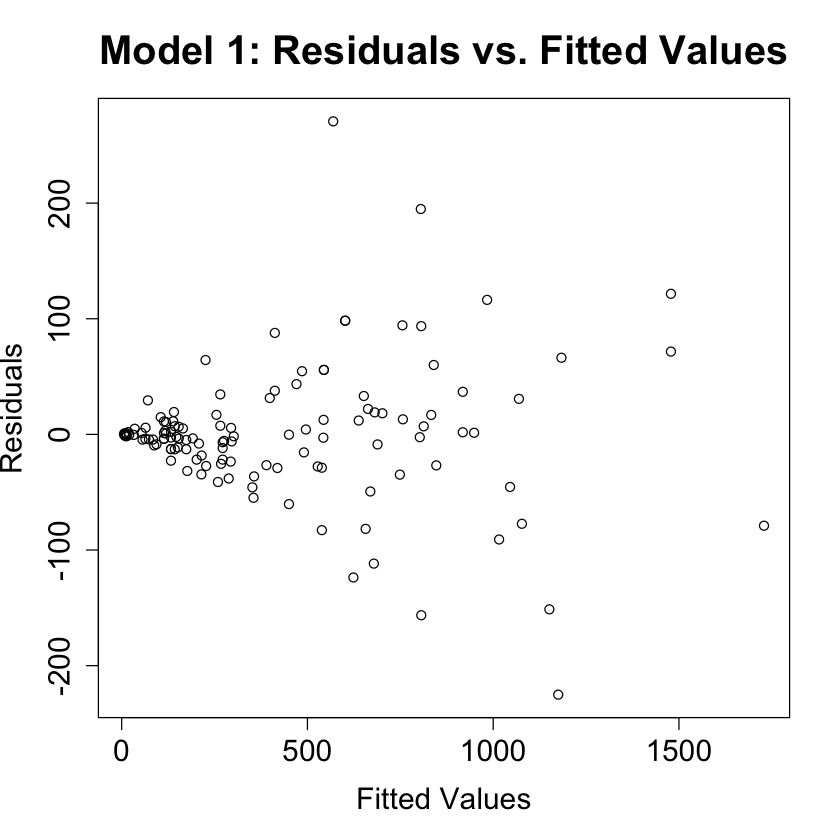

In [11]:
# fig. 8

options(repr.plot.width=7, repr.plot.height=7)

plot(reg1$fitted.values, reg1$resid, main=  "Model 1: Residuals vs. Fitted Values", xlab="Fitted Values", 
ylab= "Residuals",  cex.lab=1.5, cex.axis=1.5, cex.main=2)

In [12]:
#predict on test set

pred <- predict(reg1, test_df, type = "response")
err <- (test_df$Weight) - pred

# calc RMSE
rmse <- sqrt(mean(err^2))

mx <- max(test_df$Weight)
mn <- min(test_df$Weight)

#normalized rmse 

rmse/(mx-mn)

[1] 0.06299858

### Model 2:

In [13]:
reg2 <- lm(I(log(Weight)) ~ I(log(Length1)) +Species + Width, data=train_df)
summary(reg2)


Call:
lm(formula = I(log(Weight)) ~ I(log(Length1)) + Species + Width, 
    data = train_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.207856 -0.058138  0.000777  0.058032  0.281416 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.31882    0.25756  -9.003 4.28e-15 ***
I(log(Length1))   2.33718    0.10389  22.497  < 2e-16 ***
SpeciesParkki    -0.02505    0.04493  -0.558   0.5782    
SpeciesPerch     -0.32073    0.02371 -13.530  < 2e-16 ***
SpeciesPike      -0.73431    0.05070 -14.483  < 2e-16 ***
SpeciesRoach     -0.28618    0.03189  -8.974 5.01e-15 ***
SpeciesSmelt     -1.13729    0.05016 -22.674  < 2e-16 ***
SpeciesWhitefish -0.11247    0.04516  -2.491   0.0141 *  
Width             0.13675    0.01945   7.031 1.39e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09126 on 119 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9952 
F-statistic:

In [14]:
# test for normality 

shapiro.test(reg2$residuals)


	Shapiro-Wilk normality test

data:  reg2$residuals
W = 0.99242, p-value = 0.7209


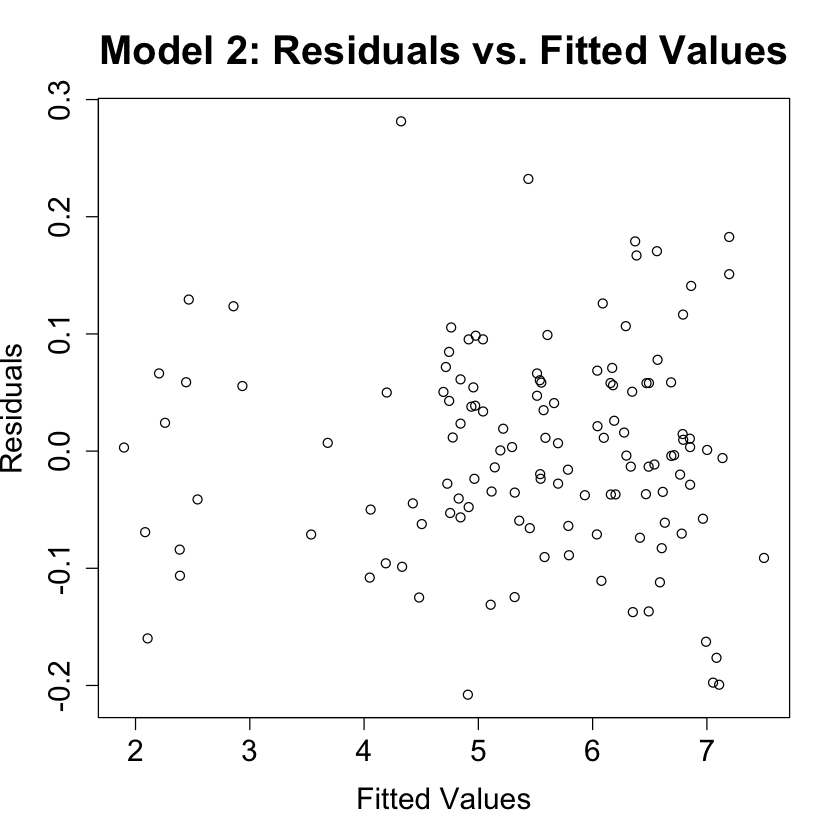

In [15]:
# fig. 9

options(repr.plot.width=7, repr.plot.height=7)

plot(reg2$fitted.values, reg2$resid, main=  "Model 2: Residuals vs. Fitted Values", xlab="Fitted Values", 
ylab= "Residuals",  cex.lab=1.5, cex.axis=1.5, cex.main=2)

In [16]:
p <- predict(reg2, test_df, type = "response")

error <- I(log(test_df$Weight)) - p

RMSE <- sqrt(mean(error^2))

max <- max(I(log(test_df$Weight)))

min <- min(I(log(test_df$Weight)))

#normalized RMSE 

RMSE/(max-min)

[1] 0.03086296